In [1]:
#Import modules
from urllib.request import urlopen
import pandas as pd
import numpy as np
import struct
import matplotlib.pyplot as plt
%matplotlib notebook

#Remote Files to be used
pza_espana_dataurl = 'https://raw.githubusercontent.com/carlosvega/MadridPollutionData/master/pza_espana.txt'
pollution_urlfiles = [pza_espana_dataurl]

In [2]:
#format specifiers

fieldwidths = (8, 2, 2, 2, 2, 2, 2) + (5,1)*24 #7 + 24
fmtstring = ' '.join('{}{}'.format(abs(fw), 'x' if fw < 0 else 's')
                    for fw in fieldwidths)
fieldstruct = struct.Struct(fmtstring)
parse = fieldstruct.unpack_from #parse function


In [3]:
rows = []
columns=['station', 'magnitude', 'value', 'time']
for urlfile in pollution_urlfiles:
    with urlopen(urlfile) as ufile:
        for line in ufile:
            fields = parse(line)
            fields = [f.decode('ascii') for f in fields] #from binary to ascii string
            station, magnitude, technique, interval, year, month, day = fields[:7]
            samples = fields[9:]
            row_base = [station, magnitude]
            row_base = [int(e) for e in row_base]
            hours = pd.date_range('{}/{}/{}'.format(day, month, year), periods=24, freq='H')
            j = 0
            for i in range(0, len(samples), 2):
                val  = samples[i]
                isok = samples[i+1]
                if isok != 'V':
                    val = np.nan
                else:
                    val = float(val) #string to float
                row = row_base + [val, hours[j]]
                j+=1
                rows.append(row)
df = pd.DataFrame(rows, columns=columns)
df

,station,magnitude,value,time
0,28079004,8,47.97,2001-01-01 00:00:00
1,28079004,8,43.85,2001-01-01 01:00:00
2,28079004,8,44.50,2001-01-01 02:00:00
3,28079004,8,47.74,2001-01-01 03:00:00
4,28079004,8,58.38,2001-01-01 04:00:00
5,28079004,8,57.01,2001-01-01 05:00:00
6,28079004,8,57.60,2001-01-01 06:00:00
7,28079004,8,60.26,2001-01-01 07:00:00
8,28079004,8,61.25,2001-01-01 08:00:00
9,28079004,8,60.73,2001-01-01 09:00:00


In [4]:
#not used but serves as documentation too
magnitude_dicc = {
    1:  'SO2',
    6:  'CO',
    7:  'NO',
    8:  'NO2',
    9:  'PM2.5',
    10:  'PM10',
    12:  'NOx',
    14:  'O3',
    20:  'TOL',
    30:  'BEN',
    35:  'EBE',
    37:  'MXY',
    38:  'PXY',
    39:  'OXY',
    42:  'TCH',
    44:  'NMHC'
}
pza_espana = 28079004 #code of the station to be used

### Using NO2 values
* NO2 (8)

<IPython.core.display.Javascript object>


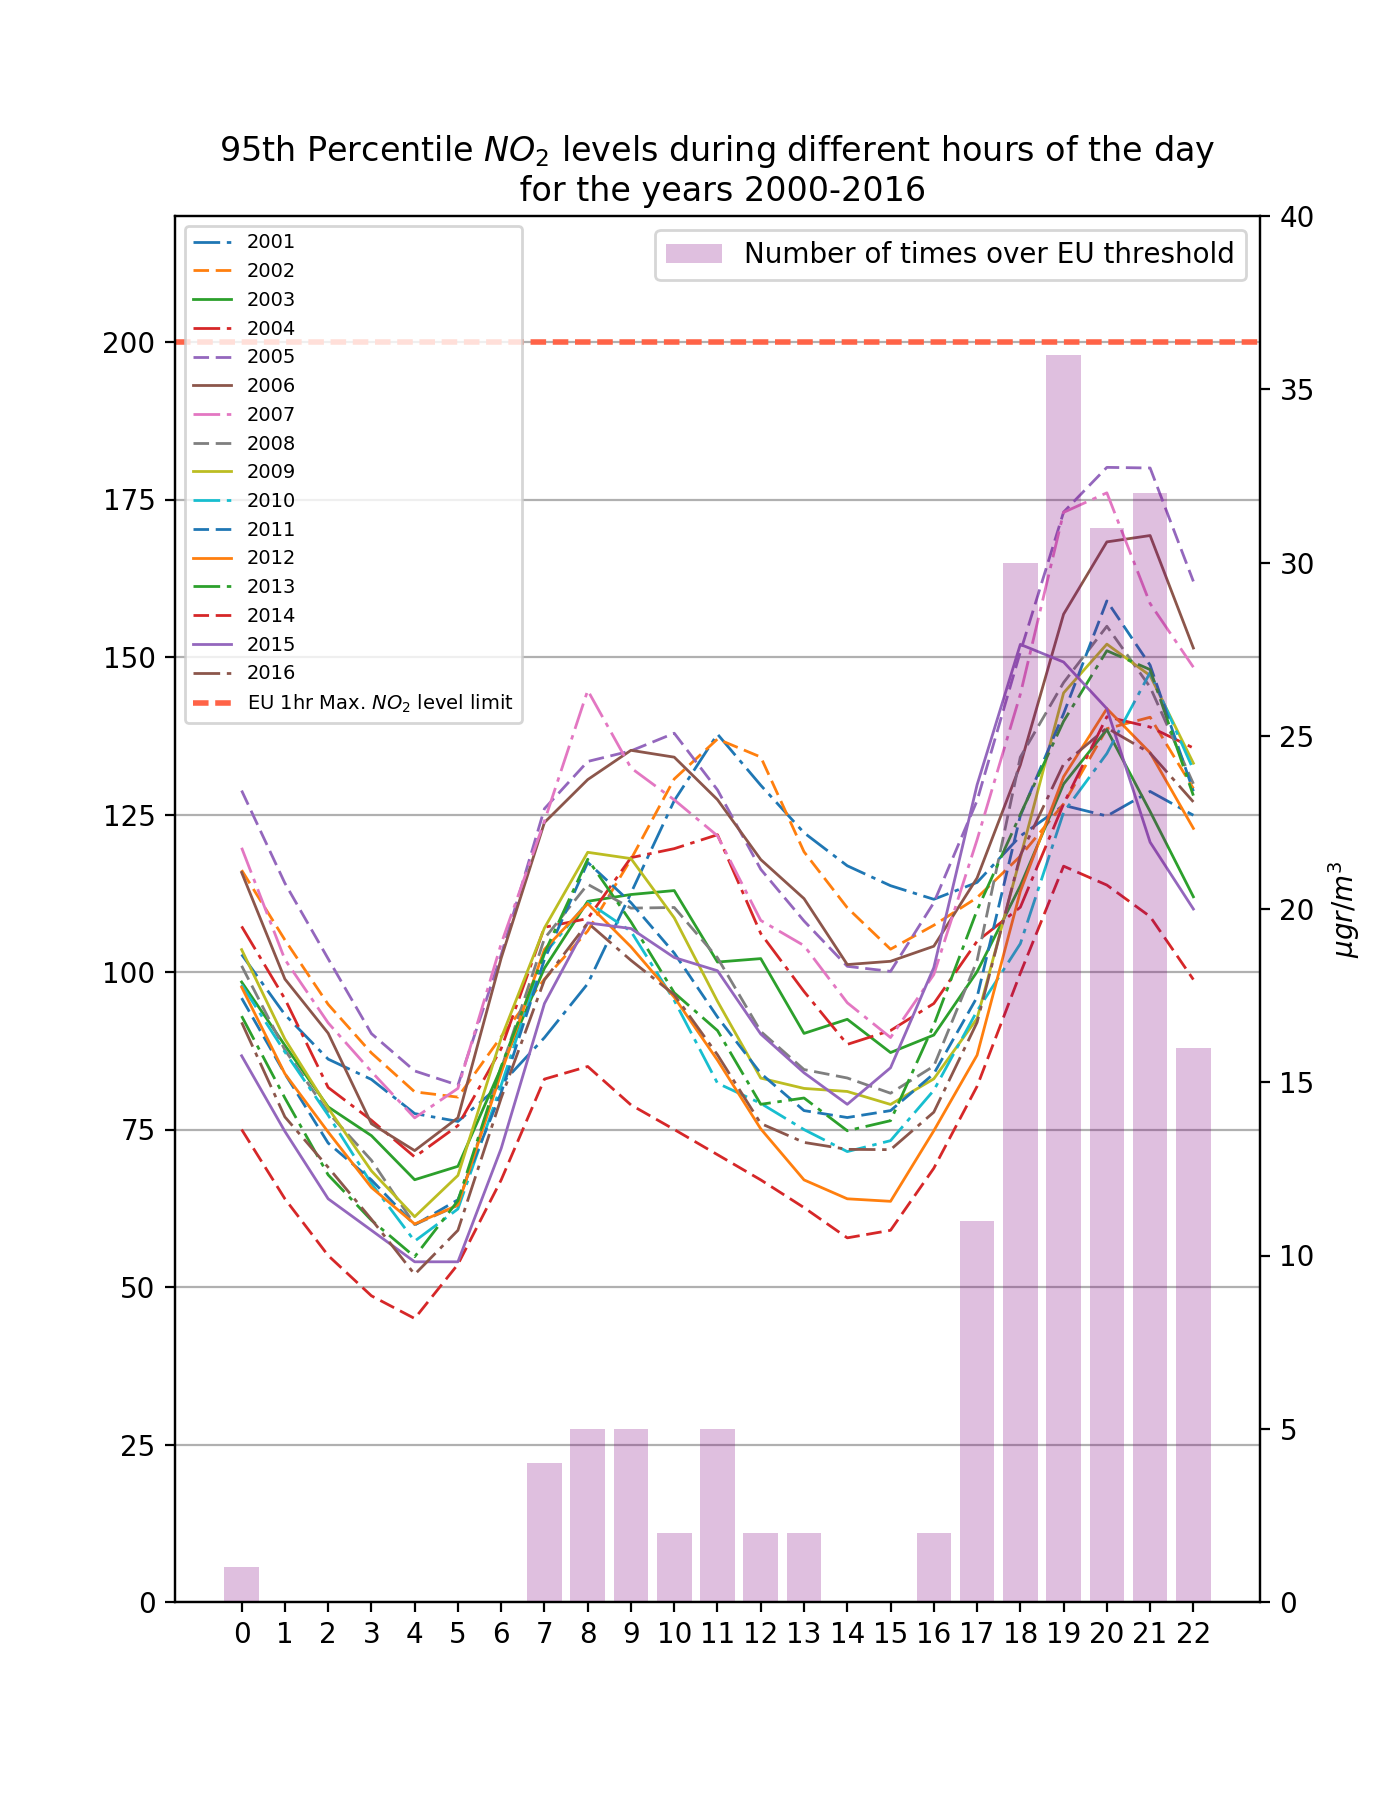

In [5]:
pza_espana_df = df[df['station'] == pza_espana].set_index('time').sort_index()
no2 = pza_espana_df[pza_espana_df['magnitude'] == 8]['value'] #NO2
formats = ['-.', '--', '-']
plt.figure(figsize=(7,9))
series = []
for year in range(2001, 2017):
    min_date = '{}-01-01'.format(year)
    max_date = '{}-12-31'.format(year)
    serie = no2.ix[min_date:max_date].groupby(lambda r: r.hour).quantile(0.95) 
    plot_series = plt.plot(serie, formats[len(series)%len(formats)], linewidth=1, label=year)
    series += [serie]
    
plt.axhline(y=200, c='tomato', linewidth=2, linestyle='--', label='EU 1hr Max. $NO_2$ level limit')
plt.xticks(serie.index)
plt.legend(prop={'size': 7})

warnings = no2[no2 > 200].groupby(lambda r: r.hour).count()
ax = plt.gca()
ax2 = ax.twinx()
warns = ax2.bar(warnings.index, warnings, color='purple', label='Number of times over EU threshold', zorder=1, alpha=0.25)
ax2.set_ylim(0, 40)
ax2.legend(loc=0)
ax2.yaxis.set_label_position('right')
plt.ylabel('Number of times over EU threshold from 2000 to 2016')

#Grid
ax2.grid(False)
ax.yaxis.grid(True)
plt.title('95th Percentile $NO_2$ levels during different hours of the day \n for the years 2000-2016', fontsize=12)
plt.xlabel('Hour of the day')
plt.ylabel('$µgr / m^3$')
ax.set_ylim(0,220);


<IPython.core.display.Javascript object>


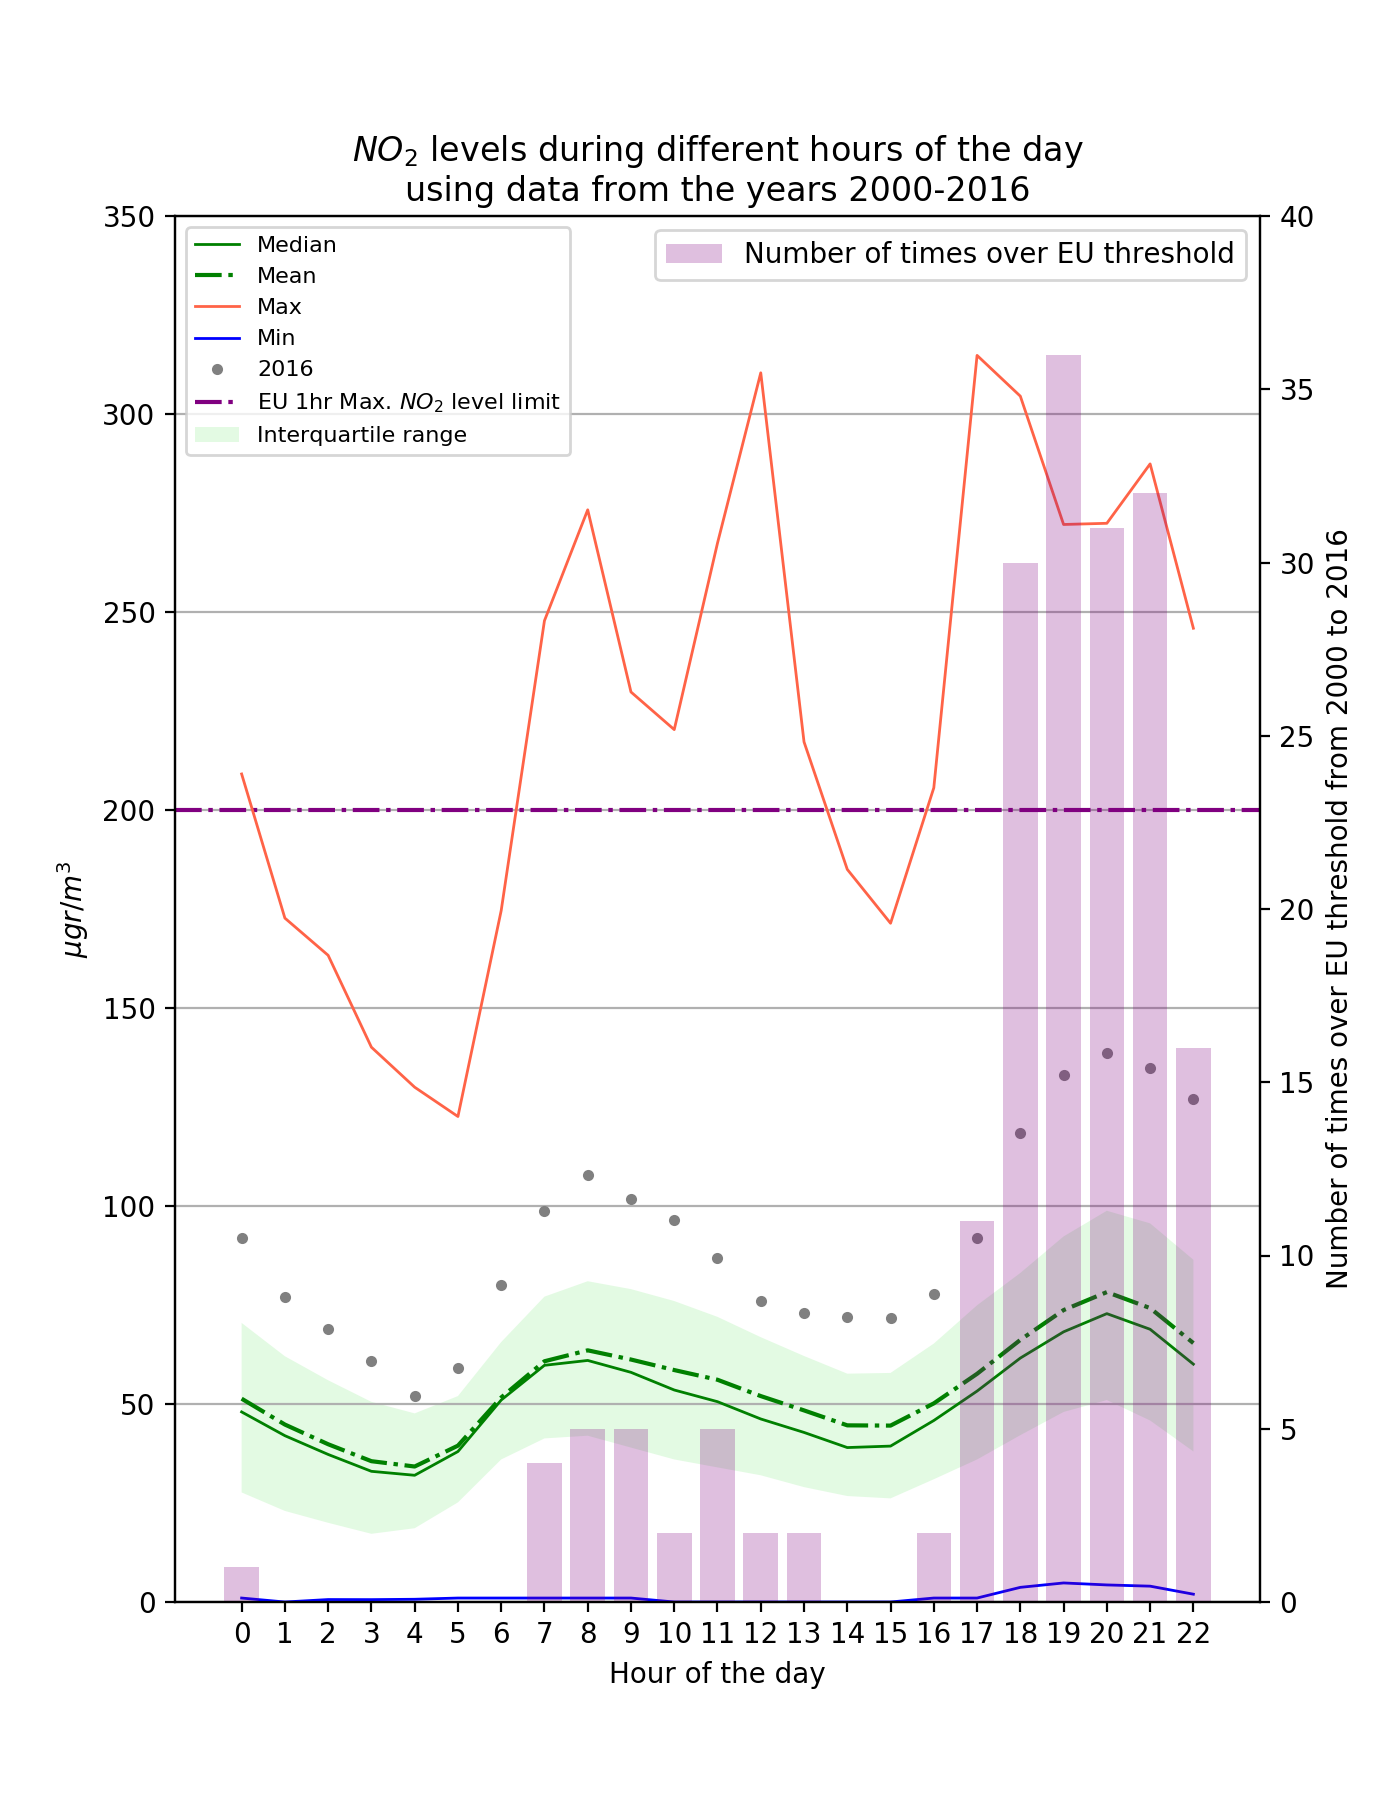

In [6]:
#Calculate different series
no2_median = no2.groupby(lambda r: r.hour).median() # ugr/m3
no2_mean = no2.groupby(lambda r: r.hour).mean() 
no2_max = no2.groupby(lambda r: r.hour).max()
no2_min = no2.groupby(lambda r: r.hour).min() 
no2_std = no2.groupby(lambda r: r.hour).std()

#Interquartile range 
no2_q1 = no2.groupby(lambda r: r.hour).quantile(0.25)
no2_q3 = no2.groupby(lambda r: r.hour).quantile(0.75)
upper_bound = no2_q3
lower_bound = no2_q1

plt.figure(figsize=(7,9));
plt.plot(no2_median, '-', label='Median', linewidth=1, c='green', zorder=10);
plt.plot(no2_mean, '-.', label='Mean', c='green', zorder=10);
plt.plot(no2_max, '-', label='Max', c='tomato', linewidth=1, zorder=10);
plt.plot(no2_min, '-', label='Min', c='blue', linewidth=1, zorder=10);
plt.plot(series[-1], '.', linewidth=1, label='2016', c='gray', zorder=10);

plt.gca().fill_between(range(no2_median.index.size), 
                       upper_bound, lower_bound, 
                       facecolor='lightgreen', 
                       alpha=0.25, label='Interquartile range')

plt.axhline(y=200, c='purple', linewidth=1.5, linestyle='-.', label='EU 1hr Max. $NO_2$ level limit')
plt.legend(prop={'size':8});
plt.ylabel('$µgr / m^3$')
plt.xlabel('Hour of the day')

warnings = no2[no2 > 200].groupby(lambda r: r.hour).count()
ax = plt.gca()
ax2 = ax.twinx()
warns = ax2.bar(warnings.index, warnings, color='purple', label='Number of times over EU threshold', zorder=1, alpha=0.25)
ax2.set_ylim(0, 40)
ax2.legend(loc=0)
ax2.yaxis.set_label_position('right')
plt.ylabel('Number of times over EU threshold from 2000 to 2016')

#Grid
ax2.grid(False)
ax.yaxis.grid(True)

plt.title('$NO_2$ levels during different hours of the day\nusing data from the years 2000-2016', fontsize=12)
ax.set_ylim(0,350);
plt.xticks(no2_median.index);

### Reference links for the recommended levels of NO2

[WHO](http://www.who.int/mediacentre/factsheets/fs313/es/)

[European Union](http://ec.europa.eu/environment/air/quality/standards.htm)
